In [78]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

urlTrain  = 'https://raw.githubusercontent.com/CyberJuan55/Proyecto-IA/master/DataSet/SpotifyFeatures_train.csv'
urlFull = 'https://raw.githubusercontent.com/CyberJuan55/Proyecto-IA/master/DataSet/SpotifyFeatures.csv'
# el train que nos dieron los profes
#df_train_original= pd.read_csv('/content/SpotifyFeatures_train.csv')
df_train_original = pd.read_csv(urlTrain)
df_train = df_train_original.copy()
# el dataset nuestro
df_full_original = pd.read_csv(urlFull)
df_full = df_full_original.copy()


### Preprocesado de datos

In [79]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)

df_train['genre']= df_train['genre'].replace(["Children’s Music"],"Children's Music")

indexNamesChildren = df_train[ df_train['genre'] == "Children's Music" ].index
df_train.drop(indexNamesChildren , inplace=True) 

indexNamesACapella = df_train[ df_train['genre'] == "A Capella" ].index
df_train.drop(indexNamesACapella , inplace=True)

df_train=df_train.drop_duplicates(subset=['track_name', 'artist_name'],keep=False) 

df_train = df_train.drop(columns=['time_signature', 'track_id', 'track_name', 'artist_name'])

In [80]:
from scipy import stats
df_train_genres = df_train
generos=list(df_train['genre'].unique())

b = []
for i in generos:
  df=df_train_genres[df_train_genres["genre"]==i].drop(columns=["genre","mode","key"])
  z = np.abs(stats.zscore(df))
  #print(np.where(z > 3))
  a=np.where(z > 3)
  outliers=list(set(list(a[0])))
  ñ = [df.iloc[x,:].name for x in outliers]
  b = ñ + b
df_train_genres.drop(b, axis = 0, inplace = True)

df_train = df_train_genres

In [81]:
# Funcion para el preprocesamiento de datos


def preprocesado(df):

   

    if df.duplicated().sum() == 0:
        print('no hay datos duplicados')
    else:
        df.drop_duplicates


    if 'Unnamed: 0' in df.columns:
        df = df.drop(['Unnamed: 0'], axis=1)
    else:
        print('no esta')  
    #df = df.drop_duplicates(subset=['track_name','artist_name'],keep=False)
    #df = df.drop(['time_signature','track_id','artist_name','track_name','key'], axis=1)

    #df['genre']= df['genre'].replace(["Children’s Music"],"Children's Music")
    #indexNamesChildren = df[ df['genre'] == "Children's Music" ].index
    #df.drop(indexNamesChildren , inplace=True)

    df["genre"] = labelencoder.fit_transform(df["genre"])

    indexPOP = df[df.popularity==0].index
    df.drop(indexPOP , inplace=True)

    #indexACO = df[df.acousticness < 0.02] .index
   # df.drop(indexACO , inplace=True)
    #indexACO1 = df[df.acousticness > 0.98] .index
   # df.drop(indexACO1 , inplace=True)

    #indexVAL = df[df.valence < 0.08] .index
    #df.drop(indexVAL , inplace=True)
    #indexVAL1 = df[df.valence > 0.9] .index
    #df.drop(indexVAL1 , inplace=True)


    cols_with_missing = [col for col in df.columns if df[col].isnull().any()] 
    faltanDatos = True
    if len(cols_with_missing)==0:
        faltanDatos= False
        print('no faltan valores') 
    if faltanDatos == True:
        print(cols_with_missing)
        df.dropna(axis=0, inplace=True)
    df["genre"] = labelencoder.fit_transform(df["genre"])
    X = df.drop(columns=['genre'])
    y = df['genre']
    

    return X,y 


In [82]:
df_train,y = preprocesado(df_train)

no esta
no faltan valores


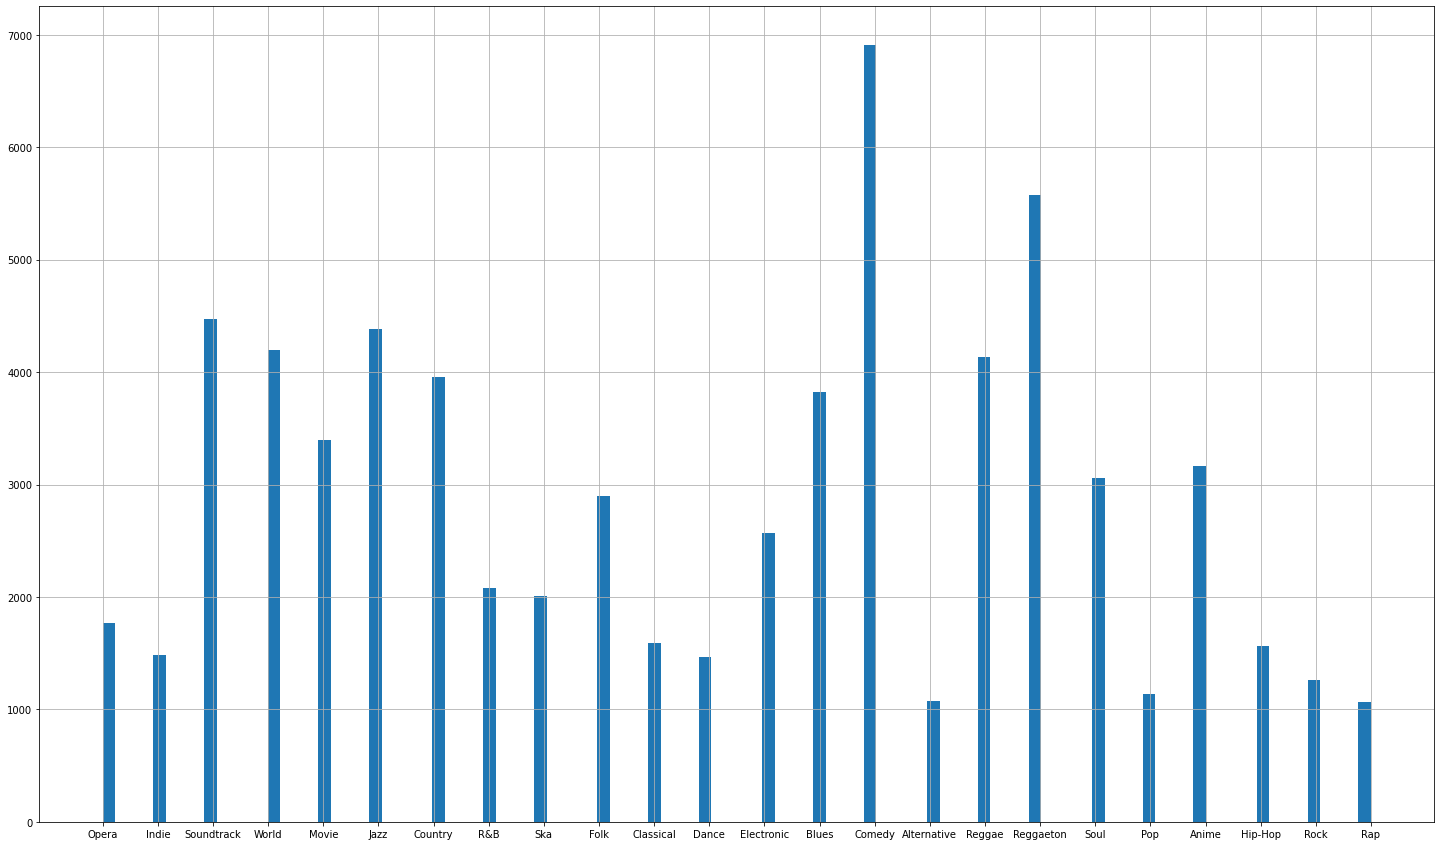

In [ ]:
y.hist(bins=100, figsize=(25,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d1e31050>,
      dtype=object)

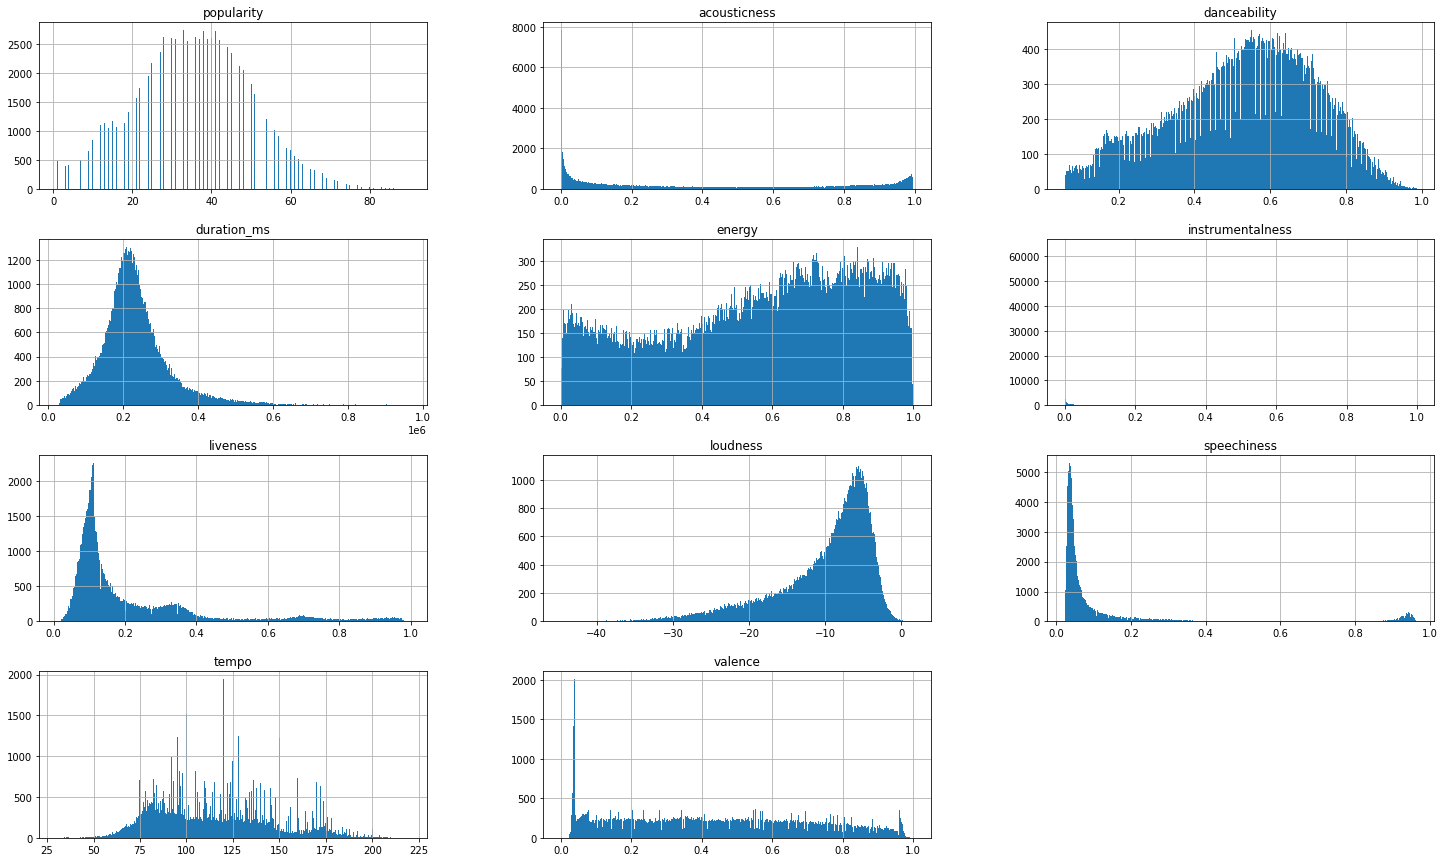

In [73]:
df_train.hist(bins=500, figsize=(25,15))

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
X_train_full, X_valid_full, y_train, y_valid = train_test_split(df_train, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [84]:
df_train_num = X_train_full.drop(['mode'], axis=1)
#"key",

In [85]:
labelencoder = LabelEncoder()

#

#y = df_train.genre #y es el target

#df_train.drop(['genre'], axis=1, inplace=True) #sacamos la columna genre del train

df_train_num = df_train.drop(['mode',"key"], axis=1) 

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('standar_scaler', StandardScaler()),
    ])
cat_attribs1 = ["key"]
cat_attribs2 = ["mode"]
num_attribs = list(df_train_num)

full_pipeline = ColumnTransformer([
        ('numerical', num_pipeline, num_attribs),                          
        #("cat", OrdinalEncoder(), cat_attribs1),
        ("cat1", OrdinalEncoder(), cat_attribs2)
    ])

In [87]:
df_train_processed = full_pipeline.fit_transform(df_train)

In [88]:
a = pd.DataFrame(df_train_processed)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1ba46ba10>,
      dtype=object)

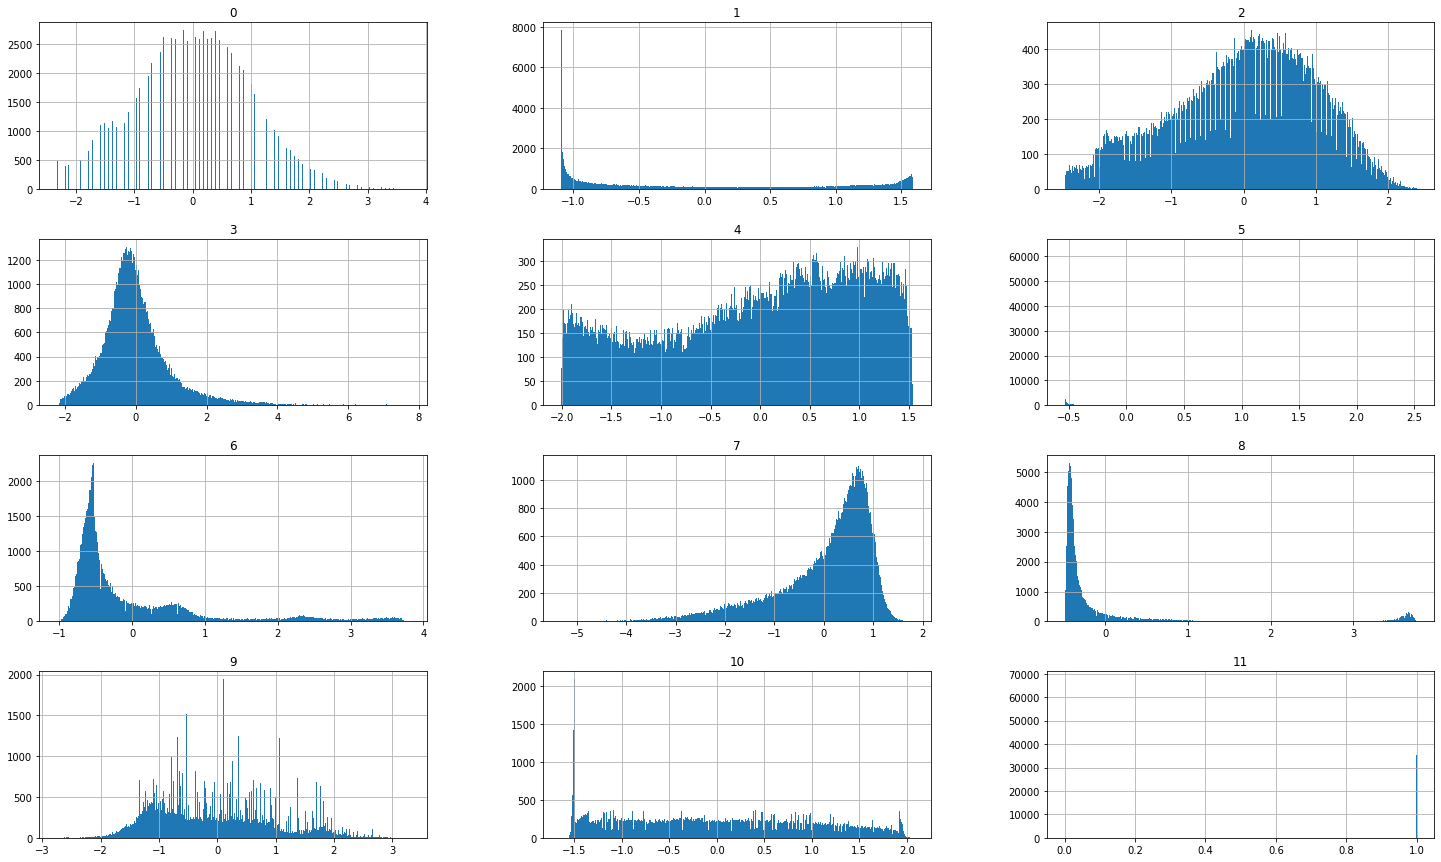

In [89]:
a.hist(bins=500, figsize=(25,15))

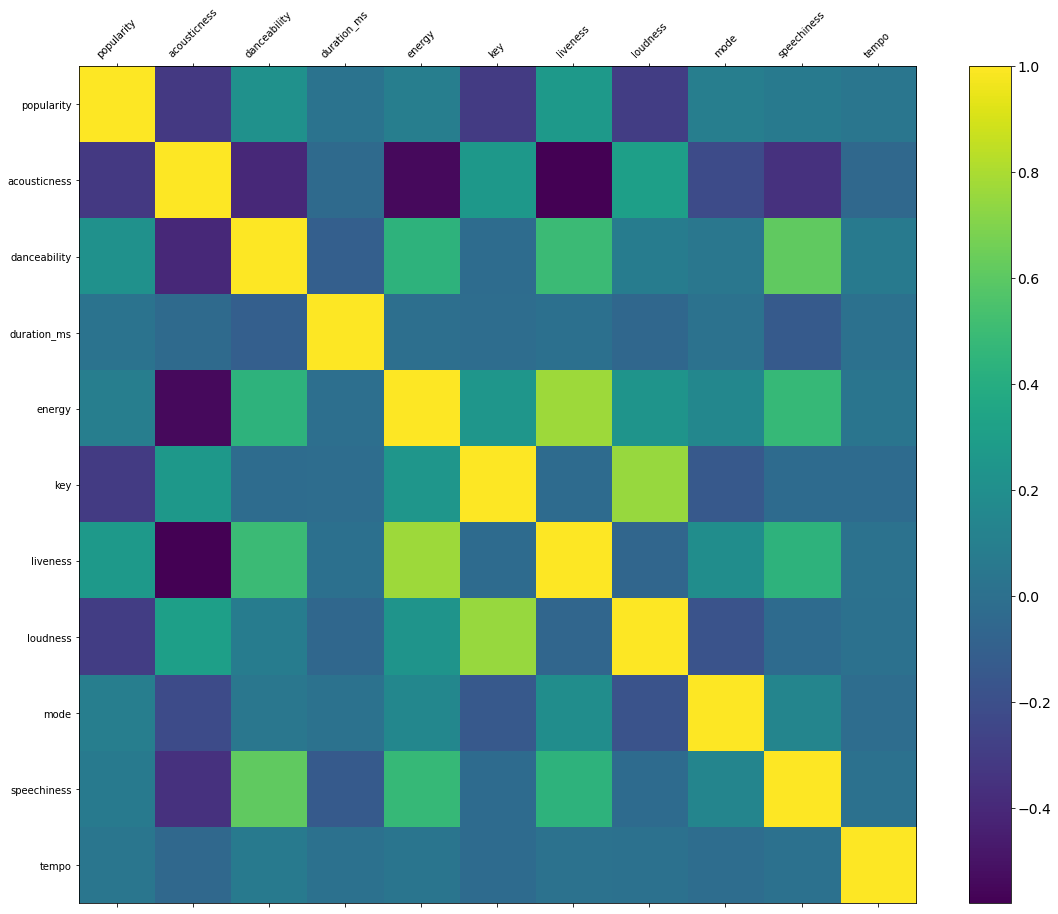

In [40]:
f = plt.figure(figsize=[19,15])
plt.matshow(a.corr(),fignum=f.number)
plt.xticks(range(a.shape[1]),df_train.columns,rotation=45)
plt.yticks(range(a.shape[1]),df_train.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [90]:
from sklearn.decomposition import PCA
dim=[]
var=[]
for comp in range(3, df_train_processed.shape[1]):
    dim.append(comp)
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df_train_processed)
    comp_check = pca.explained_variance_ratio_
    var.append(sum(comp_check))
    final_comp = comp
    if comp_check.sum() > 0.99:
        break

In [91]:
from sklearn.decomposition import PCA
pca = PCA()
#n_components= 9, random_state=42

In [92]:
pca.fit(a)


PCA()

In [93]:
x_pca = pca.transform(a)

In [94]:
print(x_pca.shape)
print(x_pca)

(103062, 12)
[[ 4.65531960e+00 -6.16586921e-01 -2.51958195e-01 ...  2.00412526e-01
  -3.76055338e-01 -1.45009397e-01]
 [-1.53806577e+00  1.29795027e-01 -5.51769218e-01 ...  5.15120108e-02
  -4.18040039e-01 -2.94386839e-01]
 [-1.09196429e-01 -6.46361055e-01 -1.45029322e-01 ... -9.77195436e-02
  -3.25301230e-01  2.22541648e-03]
 ...
 [-1.18610547e+00 -5.44736183e-02 -7.40871903e-01 ...  3.80794215e-01
   5.48543272e-01 -4.75931360e-01]
 [-1.65696095e+00 -8.25024888e-01  1.45234149e+00 ...  1.11972880e-01
   5.88875146e-01  3.13613386e-01]
 [ 2.06724281e+00 -1.01349917e+00  7.72069282e-01 ... -5.95837968e-01
   6.10493342e-01 -4.81674982e-01]]


Text(0.5, 0, 'Cantidad de componentes principales')

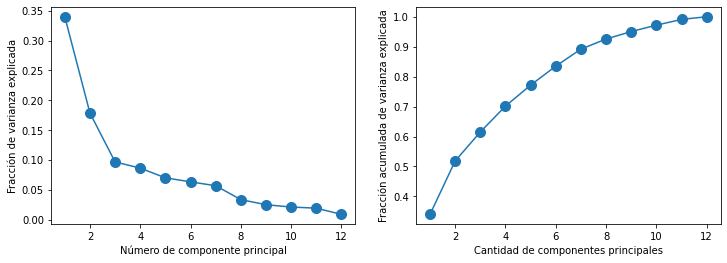

In [95]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

In [96]:
pca = PCA(n_components= 10, random_state=42)


In [ ]:
lg=LogisticRegression(max_iter=2000, random_state=1, penalty = 'l2', C = 0.01) #onevsrestclassifier

In [ ]:
from sklearn.pipeline import make_pipeline
LGpipe = make_pipeline(full_pipeline,lg)
#LGpipe.fit(X_train_full,y_train)


In [ ]:
lg_cross_val = cross_val_score(LGpipe,X_train_full,y_train,cv=5,scoring='accuracy').mean()

In [ ]:
lg_cross_val

0.48673848103557527

In [ ]:
params = {}

params['logisticregression__C'] = [0.1,1,10]


In [ ]:
lGgrid = GridSearchCV(LGpipe, params, cv=5,scoring='accuracy' )
lGgrid.fit(X_train_full,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['popularity',
                                                                          'acousticness',
                                                                          'danceability',
                                                                          'duration_ms',
                                                                          'energy',
                                                                          'instrumentalness',
                                                                          'liveness'

In [ ]:
lGgrid.best_score_

0.41750536990312115

### DesicionTree

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

dtcPipe = make_pipeline(full_pipeline,dtc)
dtcPipe.fit(X_train_full,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['popularity', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['key']),
                                                 ('cat1', OrdinalEncoder(),
                    

In [ ]:
dtc_cross_val = cross_val_score(dtcPipe,X_train_full,y_train,cv=5,scoring='accuracy').mean()

In [ ]:
dtc_cross_val

0.42534350227842843

### RandomForest

In [97]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=250, random_state=42)

rfcPipe = make_pipeline(full_pipeline,pca,rfc)
rfcPipe.fit(X_train_full,y_train)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standar_scaler',
                                                                   StandardScaler())]),
                                                  ['popularity', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('cat1', OrdinalEncoder(),
                                                  ['mode'])])),
                ('pca', PCA(n_components=10, random_state=42)),
             

In [98]:
predict = rfcPipe.predict(X_valid_full)

In [99]:
print(accuracy_score(y_valid, predict))

0.5519817590840732


In [ ]:
from sklearn.metrics import roc_auc_score



In [ ]:
rfc_cross_val = cross_val_score(rfcPipe,X_train_full,y_train,cv=5,scoring='accuracy')

In [ ]:
rfc_cross_val

array([0.57264416, 0.56802752, 0.57137684, 0.57409251, 0.56748438])

In [ ]:
predict = rfc.predict(X_valid_full)
print(accuracy_score(y_valid, predict))

###KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knnPipe = make_pipeline(full_pipeline,pca,knn)
knnPipe.fit(X_train_full, y_train)
#y_pred_knn = knn.predict(X_valid_full)
#print(accuracy_score(y_valid, y_pred_knn))


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standar_scaler',
                                                                   StandardScaler())]),
                                                  ['popularity', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('cat1', OrdinalEncoder(),
                                                  ['mode'])])),
                ('pca', PCA(n_components=10, random_state=42)),
             

In [101]:
y_pred_knn = knnPipe.predict(X_valid_full)
print(accuracy_score(y_valid, y_pred_knn))


0.5432494057148402


In [ ]:
# Numero de arboles
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 8)]
# Numero de features considerado al dividir
max_features = ['auto', 'sqrt']
# numero maximo de niveles
#max_depth = [2,4]
# Numero minimo de niveles por nodo
min_samples_split = [2, 5]
# Numero minimo de niveles por hoja
min_samples_leaf = [1, 2]
# metodo de seleccion por arbol 
bootstrap = [True, False]

### GridSerchCv RandonForest

In [ ]:
#'randomforestclassifier__n_jobs': None
#'randomforestclassifier__n_estimators': 30,
params = {}

params['logisticregression__C'] = [0.1,1,10]


# Grilla
param_grid = {}
param_grid['randomforestclassifier__n_estimators'] = n_estimators
param_grid['randomforestclassifier__max_features'] = max_features
#param_grid['randomforestclassifier__max_depth'] = max_depth
param_grid['randomforestclassifier__min_samples_split'] = min_samples_split
#param_grid['randomforestclassifier__min_samples_leaf'] = min_samples_leaf = [1, 2]
param_grid['randomforestclassifier__bootstrap']  = bootstrap
          
          
               #'bootstrap': bootstrap

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_Grid = GridSearchCV(estimator = rfcPipe, param_grid = param_grid, cv = 5, scoring='accuracy')
#, verbose=2, n_jobs = 4

In [ ]:
rfc_Grid.fit(X_train_full, y_train)


In [ ]:
rfcPipe.get_params()

In [ ]:
rfc_Grid.best_score_

0.5035514165119226

In [104]:

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=250,
     max_depth=5, random_state=0)

In [ ]:
XGBpipe = make_pipeline(full_pipeline,pca, clf)
XGBpipe.fit(X_train_full,y_train)

In [25]:
XGboost_cross_val = cross_val_score(XGBpipe,X_train_full,y_train,cv=5,scoring='accuracy')

In [26]:
XGboost_cross_val

array([0.56015208, 0.56531185, 0.56078573, 0.55897529, 0.55562596])

In [ ]:
from sklearn.metrics import roc_auc_score